In [15]:
#%matplotlib notebook

import numpy as np
import pandas as pd
import os
from numpy import mean


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap
import umap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize


In [3]:
dataCSV = pd.read_csv('extracted-all-projects.csv')

raw = dataCSV['raw']

In [6]:
# raw.to_csv('raw.csv')

In [4]:
features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383']

In [49]:
a = ""
for i in range(384):
    a = a + ",'feature_"+str(i)+"'"


In [6]:
vectorCSV = pd.read_csv('vector.csv')


In [7]:
dataCSV['id']=range(1, len(dataCSV) + 1)
vectorCSV['id']=range(1, len(vectorCSV) + 1)
switchedCSV = vectorCSV[['id','name','feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383']]
switchedCSV['category'] = dataCSV['category']

/var/folders/s8/vyj613fs57b4g86vrn1xc5t80000gn/T/ipykernel_20917/4267885417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switchedCSV['category'] = dataCSV['category']


In [8]:

switchedCSV['category'].replace(np.nan, 'NonFlaky', inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [9]:
# use the result from code2vec as vector val
#vector_val = switchedCSV[features]
switchedCSV = switchedCSV[(switchedCSV['category'] == 'ID') | (switchedCSV['category'] == 'UD') |(switchedCSV['category'] == 'OD') | (switchedCSV['category'] == 'OD-Vic') | (switchedCSV['category'] == 'OD-Brit') | (switchedCSV['category'] == 'NOD') | (switchedCSV['category'] == 'NDOD') | (switchedCSV['category'] == 'NODI') | (switchedCSV['category'] == 'NonFlaky')]
vector_val = switchedCSV[features]


In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 50, 100, 200, 500]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 20, 50, 100, 200]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [36]:
import random

In [91]:
index = random.randrange(len(random_grid))
print(index)
print(random_grid['n_estimators'][random.randrange(len(random_grid['n_estimators']))])

2
100


In [18]:
print(switchedCSV.shape)

(6902, 387)


In [11]:
print(589/1257)
print(307/1257)
print(133/1257)
print(109/1257)
print(93/1257)
print(15/1257)
print(11/1257)

0.46857597454256167
0.24423229912490055
0.10580747812251393
0.08671439936356404
0.07398568019093078
0.011933174224343675
0.008750994431185362


In [23]:
tableDf = dataCSV[['id','raw','category']]
tableDf['category'].replace(np.nan, 'NonFlaky', inplace=True)
tableDf = tableDf[(tableDf['category'] == 'ID') | (tableDf['category'] == 'UD') |(tableDf['category'] == 'OD') | (tableDf['category'] == 'OD-Vic') | (tableDf['category'] == 'OD-Brit') | (tableDf['category'] == 'NOD') | (tableDf['category'] == 'NDOD') | (tableDf['category'] == 'NODI')| (tableDf['category'] == 'NonFlaky')]

idList = tableDf.id.unique()
categoryList = tableDf.category.unique()
print(len(idList))
print(categoryList)
print(tableDf['category'].value_counts())
print(tableDf.shape )


for id in idList:
    idDf = tableDf[(tableDf['id']==id)]
    print(id + ' size '+str(len(idDf.index)))
    print(idDf['category'].value_counts())

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


111
['ID' 'OD' 'NonFlaky' 'UD' 'OD-Vic' 'OD-Brit' 'NOD' 'NDOD']
NonFlaky    5645
ID           589
OD           307
OD-Vic       133
NOD          109
UD            93
OD-Brit       15
NDOD          11
Name: category, dtype: int64
(6902, 3)
Mapper size 175
NonFlaky    100
OD           70
ID            5
Name: category, dtype: int64
Activiti size 80
NonFlaky    57
OD-Vic      12
OD-Brit      8
UD           3
Name: category, dtype: int64
easyexcel size 7
NonFlaky    5
OD          2
Name: category, dtype: int64
fastjson size 210
NonFlaky    143
ID           46
OD           16
NOD           3
NDOD          2
Name: category, dtype: int64
innodb-java-reader size 115
NonFlaky    70
ID          45
Name: category, dtype: int64
jetcache size 24
NonFlaky    18
ID           6
Name: category, dtype: int64
nacos size 4
NonFlaky    3
OD-Vic      1
Name: category, dtype: int64
testable-mock size 7
NonFlaky    6
ID          1
Name: category, dtype: int64
alien4cloud size 3
NonFlaky    2
OD          1
Nam

In [19]:
# use ifidf vector as vector val
tfidfDf = dataCSV[['raw','category']]
tfidfDf['category'].replace(np.nan, 'NonFlaky', inplace=True)
tfidfDf = tfidfDf[(tfidfDf['category'] == 'ID') | (tfidfDf['category'] == 'UD') |(tfidfDf['category'] == 'OD') | (tfidfDf['category'] == 'OD-Vic') | (tfidfDf['category'] == 'OD-Brit') | (tfidfDf['category'] == 'NOD') | (tfidfDf['category'] == 'NDOD') | (tfidfDf['category'] == 'NODI')]


tfidfconverter = TfidfVectorizer(max_features=384, min_df=5, max_df=0.7)
vector_raw = tfidfconverter.fit_transform(tfidfDf['raw'])
vector_val = vector_raw.toarray()

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [8]:
pca = PCA(n_components=3 , random_state=0)
pca.fit(vector_val)
pca_val = pca.transform(vector_val)

/usr/local/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


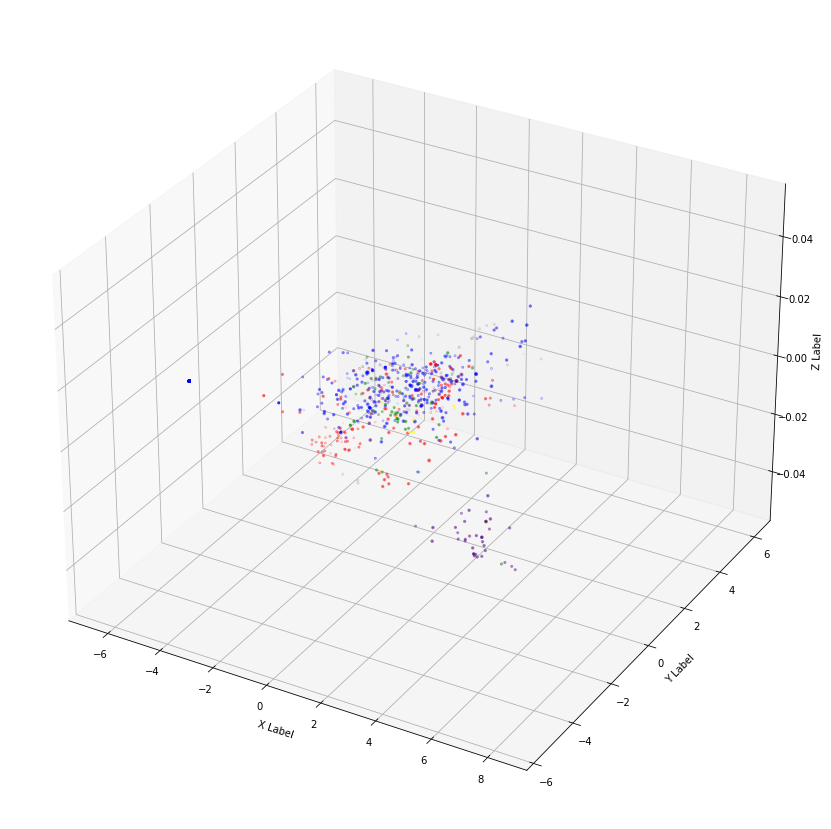

In [10]:

fig = plt.figure(figsize = [15,15])

ax = fig.add_subplot(projection='3d')

category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
lw = 2

for color, i, category_names in zip(colors, category_names, category_names):
    plt.scatter(
        pca_val[switchedCSV['category'] == i, 0], pca_val[switchedCSV['category'] == i, 1], pca_val[switchedCSV['category'] == i, 2], color=color, alpha=0.5, lw=lw, label=category_names
    )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
fig.savefig('3d_test.png')

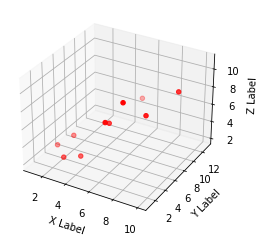

In [11]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
lda = LinearDiscriminantAnalysis(n_components=3)
lda_val = lda.fit_transform(vector_val, switchedCSV['category'])

In [11]:


fig = plt.figure(figsize = [15,15])

ax = fig.add_subplot(projection='3d')

category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
lw = 2

for color, i, category_names in zip(colors, category_names, category_names):
    plt.scatter(
        lda_val[switchedCSV['category'] == i, 0], lda_val[switchedCSV['category'] == i, 1], lda_val[switchedCSV['category'] == i, 2], color=color, alpha=0.5, lw=lw, label=category_names
    )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [24]:
docDf = dataCSV[['raw','category']]
docDf['category'].replace(np.nan, 'NonFlaky', inplace=True)
docDf = docDf[(docDf['category'] == 'NonFlaky') |(docDf['category'] == 'ID') | (docDf['category'] == 'UD') |(docDf['category'] == 'OD') | (docDf['category'] == 'OD-Vic') | (docDf['category'] == 'OD-Brit') | (docDf['category'] == 'NOD') | (docDf['category'] == 'NDOD') | (docDf['category'] == 'NODI')]
print(docDf.shape)

(6902, 2)


In [47]:
import re

In [ ]:
def doc2vecPreprocess(code):
    code = re.sub(r"(?<=\w)([A-Z])", r" \1", code)
    code = re.sub(r'[^A-Za-z0-9 ]+', '', code)
    code = code.lower()
    return code

docDf['raw'] = docDf['raw'].apply(doc2vecPreprocess)

print(docDf.head())

In [71]:
train, test = train_test_split(docDf, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['raw']), tags=[r.category]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['raw']), tags=[r.category]), axis=1)
doc_tagged = docDf.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['raw']), tags=[r.category]), axis=1)

In [ ]:
train_tagged.values[30]

In [65]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors


In [59]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [91]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=384, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
#model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
model_dmm.build_vocab([x for x in tqdm(doc_tagged.values)])

100%|██████████| 1257/1257 [00:00<00:00, 246124.84it/s]


In [62]:

from sklearn import utils

In [ ]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(doc_tagged.values)]), total_examples=len(doc_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

In [93]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

doc_y, doc_X = vec_for_learning(model_dmm, doc_tagged)


In [ ]:
print(doc_X)

In [ ]:
print(switchedCSV['category'].value_counts())

In [ ]:
print(switchedCSV['category'].unique())


In [94]:
n_pc = 2
pca = PCA(n_components=n_pc , random_state=0)
pca.fit(doc_X)
pca_val = pca.transform(doc_X)


In [12]:
category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NOD;UD','NOD;OD-Vic','NDOD;NOD','ID;NOD','NDOD;NOD;OD-Vic','NDOD;OD-Vic','NDOD;UD','NDOD;NOD;UD','NDOD;NOD;OD-Brit','NDOI','OD;UD']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru","gold", "pink", "aqua", "darkorange", "orchid", "grey", "turquoise", "navy", "teal", "wheat"]

In [ ]:
# scree plot to check how significant each dimension is
# https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/
category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
lw = 2
plt.figure(figsize=[10,10])
for color, i, category_names in zip(colors, category_names, category_names):
    plt.scatter(
        pca_val[switchedCSV['category'] == i, 0], pca_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
    )

#for i in range(len(pca_val)):
#    plt.annotate(str(i), (pca_val[i,0], pca_val[i,1] + 0.2))

#for index, row in pca_val.iterrows():
#    plt.annotate(str(index), (row[0], row[1] + 0.2))

plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("PCA of flaky tests dataset")
plt.savefig('PCA_doc2vec.png')


In [ ]:

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
tsne_val = tsne.fit_transform(doc_X)


In [ ]:
category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
lw = 2
plt.figure(figsize=[10,10])
for color, i, category_names in zip(colors, category_names, category_names):
    plt.scatter(
        tsne_val[switchedCSV['category'] == i, 0], tsne_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
    )

#for i in range(len(tsne_val)):
#    plt.annotate(str(i), (tsne_val[i,0], tsne_val[i,1] + 0.2))

plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("t-SNE of flaky tests dataset")
plt.savefig('t-SNE_doc2vec.png')

In [ ]:
perplexity_list = [10, 25, 50, 100]
iter_list = [250, 500, 700, 1000]

for perp in perplexity_list:
    for iter in iter_list:
        tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iter)
        tsne_val = tsne.fit_transform(vector_val)

        category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

        colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
        lw = 2
        plt.figure(figsize=[10,10])
        for color, i, category_names in zip(colors, category_names, category_names):
            plt.scatter(
                tsne_val[switchedCSV['category'] == i, 0], tsne_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
            )
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        #plt.title("t-SNE of flaky tests dataset perp "+ str(perp)+' iter '+str(iter))
        figure_name = 't-SNE_code2vec_p'+str(perp)+'_i'+str(iter)+'.png'
        plt.savefig(figure_name)

LDA linear discriminative analysis
supervised

Umap

isomap

Also 3D plot instead of 2D

In [12]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_val = lda.fit_transform(vector_val, switchedCSV['category'])

In [13]:
search_space = [Integer(1, 5, name='n_neighbors'), Integer(1, 2, name='p')]

In [14]:
@use_named_args(search_space)
def evaluate_model(**params):
	# something
	model.set_params(**params)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
	# calculate the mean of the scores
	estimate = mean(result)
	return 1.0 - estimate

In [16]:
result = gp_minimize(evaluate_model, search_space)

NameError: name 'model' is not defined

In [ ]:
category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
lw = 2
plt.figure(figsize=[10,10])
for color, i, category_names in zip(colors, category_names, category_names):
    plt.scatter(
        lda_val[switchedCSV['category'] == i, 0], lda_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
#plt.title("LDA of flaky tests dataset")
plt.savefig('LDA_doc2vec.png')

In [ ]:
#neighbors_list = [3, 5, 10, 20]
neighbors_list = [3]

for neighbors in neighbors_list:
    # n_neighbors = 5 does not show good result. Many overlapping except purple
    # increase to 20 still many overlap. Seems to be worse than 5
    isomap = Isomap(n_neighbors=neighbors, n_components=2)
    isomap_val = isomap.fit_transform(doc_X, doc_y)

    category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

    colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
    lw = 2
    plt.figure(figsize=[10,10])
    for color, i, category_names in zip(colors, category_names, category_names):
        plt.scatter(
            isomap_val[switchedCSV['category'] == i, 0], isomap_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    #plt.title("Isomap of flaky tests dataset neighbors "+str(neighbors))
    plt.savefig('Isomap_doc2vec_n_'+str(neighbors)+'.png')

In [ ]:
#neighbors_list = [5, 20, 80, 320]
#min_dist_list = [0.0125, 0.05, 0.2, 0.5]
neighbors_list = [5]
min_dist_list = [ 0.5]

for neighbors in neighbors_list:
    for dist in min_dist_list:
        umap_reducer = umap.UMAP(n_neighbors=neighbors, n_components=2, min_dist=dist)
        umap_val = umap_reducer.fit_transform(doc_X)

        category_names = ['ID','OD','UD','OD-Vic','OD-Brit','NOD','NDOD','NDOI']

        colors = ["blue", "red", "indigo", "green", "yellow", "silver", "maroon", "peru"]
        lw = 2
        plt.figure(figsize=[10,10])
        for color, i, category_names in zip(colors, category_names, category_names):
            plt.scatter(
                umap_val[switchedCSV['category'] == i, 0], umap_val[switchedCSV['category'] == i, 1], color=color, alpha=0.5, lw=lw, label=category_names
            )

        #for i in range(len(umap_val)):
        #    plt.annotate(str(i), (umap_val[i,0], umap_val[i,1] + 0.2))
        
        plt.legend(loc="best", shadow=False, scatterpoints=1)
        #plt.title("UMAP of flaky tests dataset n "+str(neighbors)+' d '+str(dist))
        plot_name = 'UMAP_doc2vec_n_'+str(neighbors)+'_d_'+str(dist)+'.png'
        plt.savefig(plot_name)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(lda_val, switchedCSV['category'], test_size=0.2, random_state=42)

In [100]:
def evaluate(y_pred, y_test):
    print("Precision: "+str(precision_score(y_pred, y_test, average='weighted')))
    print("Recall: "+str(recall_score(y_pred, y_test, average='weighted')))
    print("F1 score: "+str(f1_score(y_pred, y_test, average='weighted')))

In [ ]:
classifier = RandomForestClassifier(max_depth=4, random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

evaluate(y_pred, y_test)

In [127]:
import math
from collections import Counter

In [137]:
unique, counts = np.unique(y_pred, return_counts=True)
output_dict = dict(zip(unique, counts))

for category in y_test.unique():
    print(category)
    if category not in output_dict:
        output_dict[category] = 0

print(output_dict)


OD
ID
OD-Vic
NOD
NDOD
UD
OD-Brit
{'ID': 114, 'NOD': 23, 'OD': 61, 'OD-Vic': 30, 'UD': 24, 'NDOD': 0, 'OD-Brit': 0}


In [146]:
def findFlakyEntropy(input):
    entropy = 0
    input_dict = input.value_counts().to_dict()
    base = len(input.unique())

    for category in input.unique():
        p_category = input_dict[category]/input.size
        entropy = entropy - p_category * math.log(p_category, base)
    
    return entropy

def findFlakyMutualInformation(input, output):
    mutualInfo = 0
    
    categories = input.unique()
    input_dict = input.value_counts().to_dict()
    base = len(categories)

    unique, counts = np.unique(output, return_counts=True)
    output_dict = dict(zip(unique, counts))

    for category in categories:
        if category not in output_dict:
            output_dict[category] = 0

    for x_category in categories:
        for y_category in categories:
            index = 0 
            xy_occurrence = 0
            for i, v in input.items():
                if v == x_category and output[index] == y_category:
                    xy_occurrence = xy_occurrence + 1
                index = index +1
            
            p_xy = xy_occurrence/input.size
            p_x = input_dict[x_category]/input.size
            p_y = output_dict[y_category]/input.size

            if p_xy > 0:
                mutualInfo = mutualInfo + p_xy * math.log(p_xy/(p_x*p_y), base)

    return mutualInfo

def findFlakyDetectionCapacity(input, output):
    mutualInfo = findFlakyMutualInformation(input, output)
    entropy = findFlakyEntropy(input)

    return mutualInfo/entropy

In [ ]:
print(findFlakyMutualInformation(y_test,y_pred))

In [ ]:
print(type(y_test))
index = 0 
for i, v in y_test.items():
    print('index: ', i, 'value: ', v, ' predict: ', y_pred[index])
    index = index +1

In [ ]:
for i, v in enumerate(y_pred):
   print('index: ', i, 'value: ', v)

In [ ]:
clf = svm.SVC(kernel='rbf', random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

evaluate(y_pred, y_test)

In [ ]:
isc = IsolationForest(max_samples=100, random_state=0, contamination=.25)
#identify outliers:
y_pred_train = isc.fit_predict(X_train)
#Remove outliers where 1 represent inliers and -1 represent outliers:
X_train_cleaned = X_train[np.where(y_pred_train == 1, True, False)]
y_train_cleaned = y_train[np.where(y_pred_train == 1, True, False)]

rfc = RandomForestClassifier(max_depth=2, min_samples_leaf=500, min_samples_split=1000, n_estimators=20, random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

evaluate(y_pred, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50, metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

evaluate(y_pred, y_test)

In [122]:
# PCA, LDA, isomap, UMAP
embedding_list = []
components = 2

pca = PCA(n_components=components , random_state=0)
pca.fit(vector_val)
pca_val = pca.transform(vector_val)
embedding_list.append(pca_val)



In [123]:
lda = LinearDiscriminantAnalysis(n_components=components)
lda_val = lda.fit_transform(vector_val, switchedCSV['category'])
embedding_list.append(lda_val)


In [ ]:

isomap = Isomap(n_neighbors=3, n_components=components)
isomap_val = isomap.fit_transform(vector_val, switchedCSV['category'])
embedding_list.append(isomap_val)


In [125]:

umap_reducer = umap.UMAP(n_neighbors=5, n_components=components, min_dist=0.5)
umap_val = umap_reducer.fit_transform(vector_val)
embedding_list.append(umap_val)

In [23]:
print(switchedCSV['category'].shape)

(1257,)


In [ ]:
output = switchedCSV['category'].values
#output = tfidfDf['category'].values
count = 0
classifier_option = 3

#config_list = [1,2,5,10,20,50,100,200,500]
config_list = ['linear', 'poly', 'rbf', 'sigmoid']
config_name = "knernal"


for embedding in embedding_list:
    #X_train, X_test, y_train, y_test = train_test_split(embedding, switchedCSV['category'], test_size=0.33, random_state=0)
    count = count + 1

    if count == 1:
        embedding_name = "PCA"
    elif count == 2:
        embedding_name = "LDA"
    elif count == 3:
        embedding_name = "Isomap"
    elif count == 4:
        embedding_name = "UMAP"


    pre_score = []
    rec_score = []
    f1s_score = []

    for config in config_list:
        
        pre_sum = 0
        rec_sum = 0
        f1s_sum = 0

        if classifier_option == 0:
            classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=10, min_samples_split=10, n_estimators=config, random_state=0)
            classifier_name = "RandomForest"
        elif classifier_option == 1:
            classifier = KNeighborsClassifier(n_neighbors=config)
            classifier_name = "KNN"
        elif classifier_option == 2:
            classifier = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5,max_depth=3, min_samples_split=100, min_samples_leaf=config, random_state=0)
            classifier_name = "GradientBoosting"
        elif classifier_option == 3:
            classifier = svm.SVC(kernel=config, random_state=0)
            classifier_name = "SVM"

        fold = 5
        kf = KFold(n_splits=fold)
        for train_index, test_index in kf.split(embedding):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = embedding[train_index], embedding[test_index]
            y_train, y_test = output[train_index], output[test_index]

            classifier.fit(X_train,y_train)
            y_pred = classifier.predict(X_test)
            
            pre_sum += precision_score(y_pred, y_test, average='weighted')
            rec_sum += recall_score(y_pred, y_test, average='weighted')
            f1s_sum += f1_score(y_pred, y_test, average='weighted')

        pre_score.append(pre_sum/fold)
        rec_score.append(rec_sum/fold)
        f1s_score.append(f1s_sum/fold)


    plt.figure(figsize=[25,20])
    df = pd.DataFrame(np.c_[pre_score,rec_score,f1s_score], index=config_list)
    df.columns = ['pre','rec','f1s']
    df.plot.bar()
    
    plt.title(classifier_name+"_"+embedding_name+"_"+config_name)
    plot_name = classifier_name+"_"+embedding_name+"_"+config_name+'.png'
    plt.savefig(plot_name)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(pca_val, switchedCSV['category'], test_size=0.2, random_state=42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 5, 20, 50, 100, 200],
    'max_features': [2, 5, 10, "auto"],
    'min_samples_leaf': [2, 3, 4, 5, 10],
    'min_samples_split': [2, 4, 8, 10, 12],
    'n_estimators': [50, 100, 200, 400, 1000]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [ ]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

In [ ]:
fold = 5
kf = KFold(n_splits=fold)
rfc_pre_sum=0
rfc_rec_sum=0
rfc_f1s_sum=0

classifier_option = 3

for train_index, test_index in kf.split(umap_val):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = umap_val[train_index], umap_val[test_index]
    y_train, y_test = output[train_index], output[test_index]

    if classifier_option == 0:
        classifier = RandomForestClassifier(max_depth=2, min_samples_leaf=500, min_samples_split=500, n_estimators=10, random_state=0)
        classifier_name = "RandomForest"
    elif classifier_option == 1:
        classifier = KNeighborsClassifier(n_neighbors=500)
        classifier_name = "KNN"
    elif classifier_option == 2:
        classifier = GradientBoostingClassifier(learning_rate=0.05,max_depth=2, min_samples_split=500, min_samples_leaf=500, n_estimators=10, random_state=0)
        classifier_name = "GradientBoosting"
    elif classifier_option == 3:
        classifier = svm.SVC(kernel='linear', random_state=0)
        classifier_name = "SVM"
    
    #isc = IsolationForest(max_samples=100, random_state=0, contamination=0.05)
    #identify outliers:
    #y_pred_train = isc.fit_predict(X_train)
    #Remove outliers where 1 represent inliers and -1 represent outliers:
    #X_train_cleaned = X_train[np.where(y_pred_train == 1, True, False)]
    #y_train_cleaned = y_train[np.where(y_pred_train == 1, True, False)]

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    
    rfc_pre_sum += precision_score(y_pred, y_test, average='weighted')
    rfc_rec_sum += recall_score(y_pred, y_test, average='weighted')
    rfc_f1s_sum += f1_score(y_pred, y_test, average='weighted')

print(rfc_pre_sum/fold)
print(rfc_rec_sum/fold)
print(rfc_f1s_sum/fold)

In [29]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=384, window=2, min_count=1, workers=4)

In [30]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("my_doc2vec_model")
model.save(fname)
model = Doc2Vec.load(fname)
vector = model.infer_vector(["system", "response"])

In [40]:
docRaw = raw
docRaw['category'] = dataCSV['category']
#docRaw['category'].replace(np.nan, 'NonFlaky', inplace=True)
#docRaw = docRaw[(docRaw['category'] == 'ID') | (docRaw['category'] == 'UD') |(docRaw['category'] == 'OD') | (docRaw['category'] == 'OD-Vic') | (docRaw['category'] == 'OD-Brit') | (docRaw['category'] == 'NOD') | (docRaw['category'] == 'NDOD') | (docRaw['category'] == 'NODI')]

print(docRaw.shape)

(6945,)


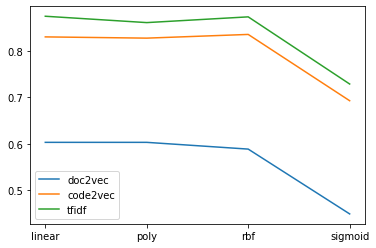

In [4]:
svmKernelList = ['linear','poly','rbf','sigmoid']
doc2vecAccuracy = [0.6033879673,0.6033879673,0.5888818391,0.4496038202]
code2vecAccuracy = [0.8299840086,0.8273027949,0.835268571,0.6928319959]
tfidfAccuracy = [0.8743485132,0.8606830227,0.873022526,0.7287268895]

plt.plot(svmKernelList, doc2vecAccuracy, label = 'doc2vec')
plt.plot(svmKernelList, code2vecAccuracy, label = 'code2vec')
plt.plot(svmKernelList, tfidfAccuracy, label = 'tfidf')
plt.legend()
plt.show()

In [10]:
m = [ [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9] ]

n = list(reversed(list(zip(*m))[::-1]))
print(n)

[(1, 4, 7), (2, 5, 8), (3, 6, 9)]
